# CUSTOMER SUBSCRIPTION PREDICTION

Importing basic libraries

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('.....setup complete')

.....setup complete


# Reading Data

In [2]:
#Reading dataset
df=pd.read_csv("bank-full.csv")
print('shape of Dataframe is',df.shape)
df.head().T

shape of Dataframe is (45211, 17)


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [3]:
#Checking null values in data, if any, and data type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Checking Numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
#converting yes and no to 0 and 1
df1 = df.replace({'no': 0,'yes': 1})

# Performing Basic EDA

Checking data

In [6]:
cat_col= [n for n in df1.columns if df1[n].dtypes == 'object']
for col in cat_col:
    print('Column Name : ',col, '\n\n')
    print(df1[col].value_counts())
    print("============"*4)

Column Name :  job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Column Name :  marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Column Name :  education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Column Name :  contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
Column Name :  month 


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
Column Name :  poutcome 


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


# Plotting Box Plot

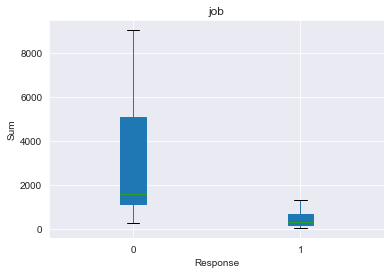

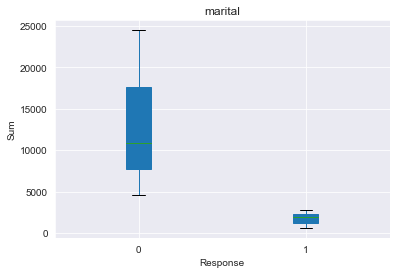

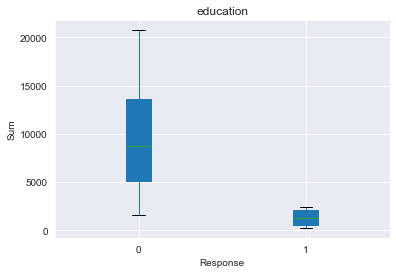

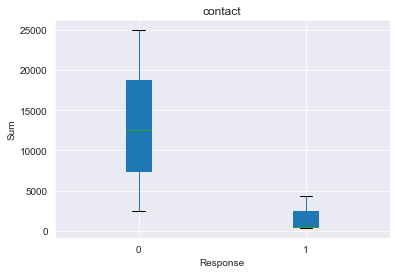

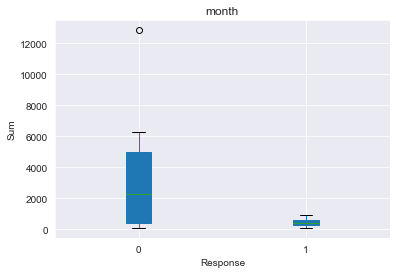

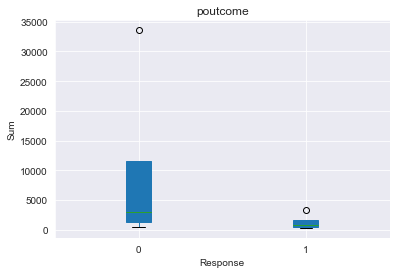

In [7]:
for col in cat_col:
    pd.crosstab(df1[col],df1.y).plot(kind='box', patch_artist = True)
    plt.title(col)
    plt.xlabel('Response')
    plt.ylabel('Sum')

# Distribution of target variable

Percentage of Response :  11.698480458295547
Percentage of No Response :  88.30151954170445


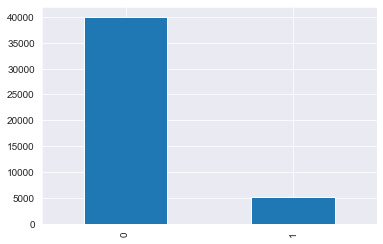

In [8]:
#check the percentage of response 

No_res = len(df1[df1['y'] == 0])
res = len(df1[df1['y'] == 1])

percent_No_res = (No_res/len(df1['y'])) * 100
percent_res = (res/len(df1['y'])) * 100


print('Percentage of Response : ',percent_res)
print('Percentage of No Response : ',percent_No_res)

df1['y'].value_counts().plot.bar()

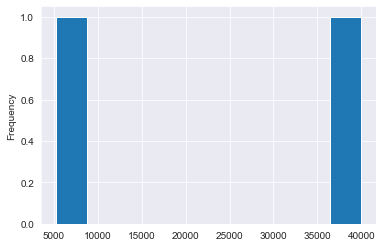

In [9]:
df1['y'].value_counts().plot.hist()

# Aggregation of numerical Columns

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#Note : There seems fishy values in pdays column in dataset.
#We will treat this later

# Data Cleaning 

In [11]:
#Checking unique values of columns
df1.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [12]:
#Checking for duplicate values if any
df1[df1.duplicated() == True]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [13]:
#No Duplicate rows found

# Correlation using heatmap

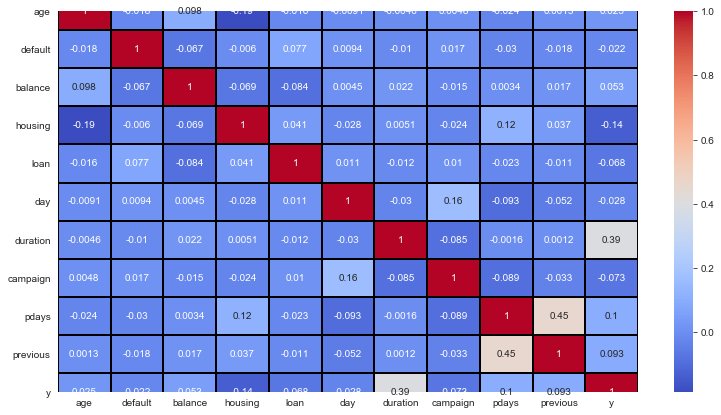

In [14]:
plt.subplots(figsize = (13,7))
sns.heatmap(df1.corr(), annot=True, cmap = 'coolwarm', linewidths = 1, linecolor = 'black') 

# Plotting Bar Plot

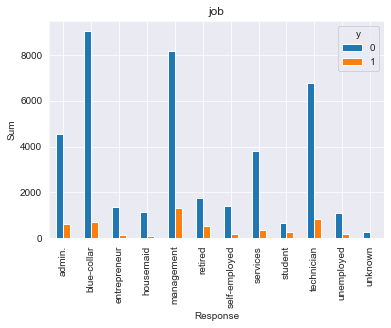

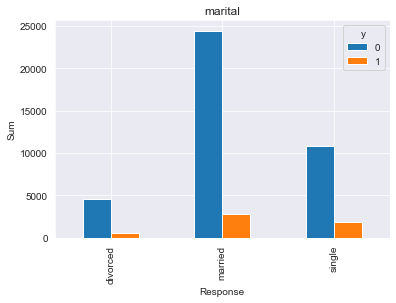

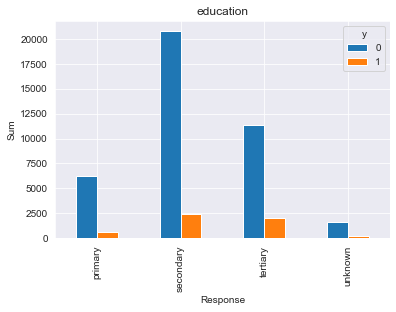

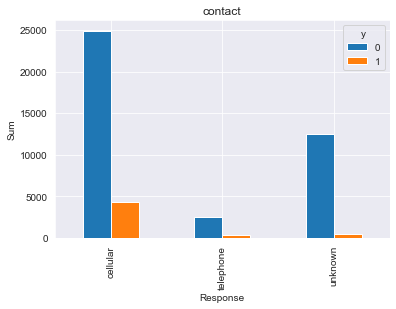

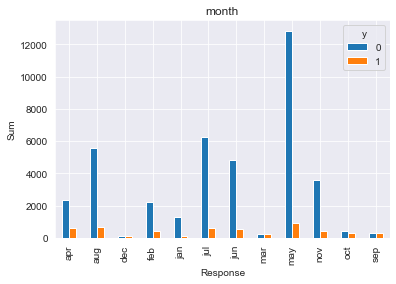

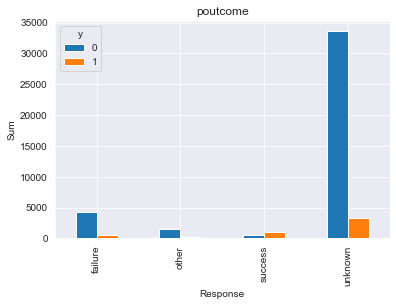

In [15]:
for col in cat_col:
    pd.crosstab(df1[col],df1.y).plot(kind='bar')
    plt.title(col)
    plt.xlabel('Response')
    plt.ylabel('Sum')

# Plotting Pairplot

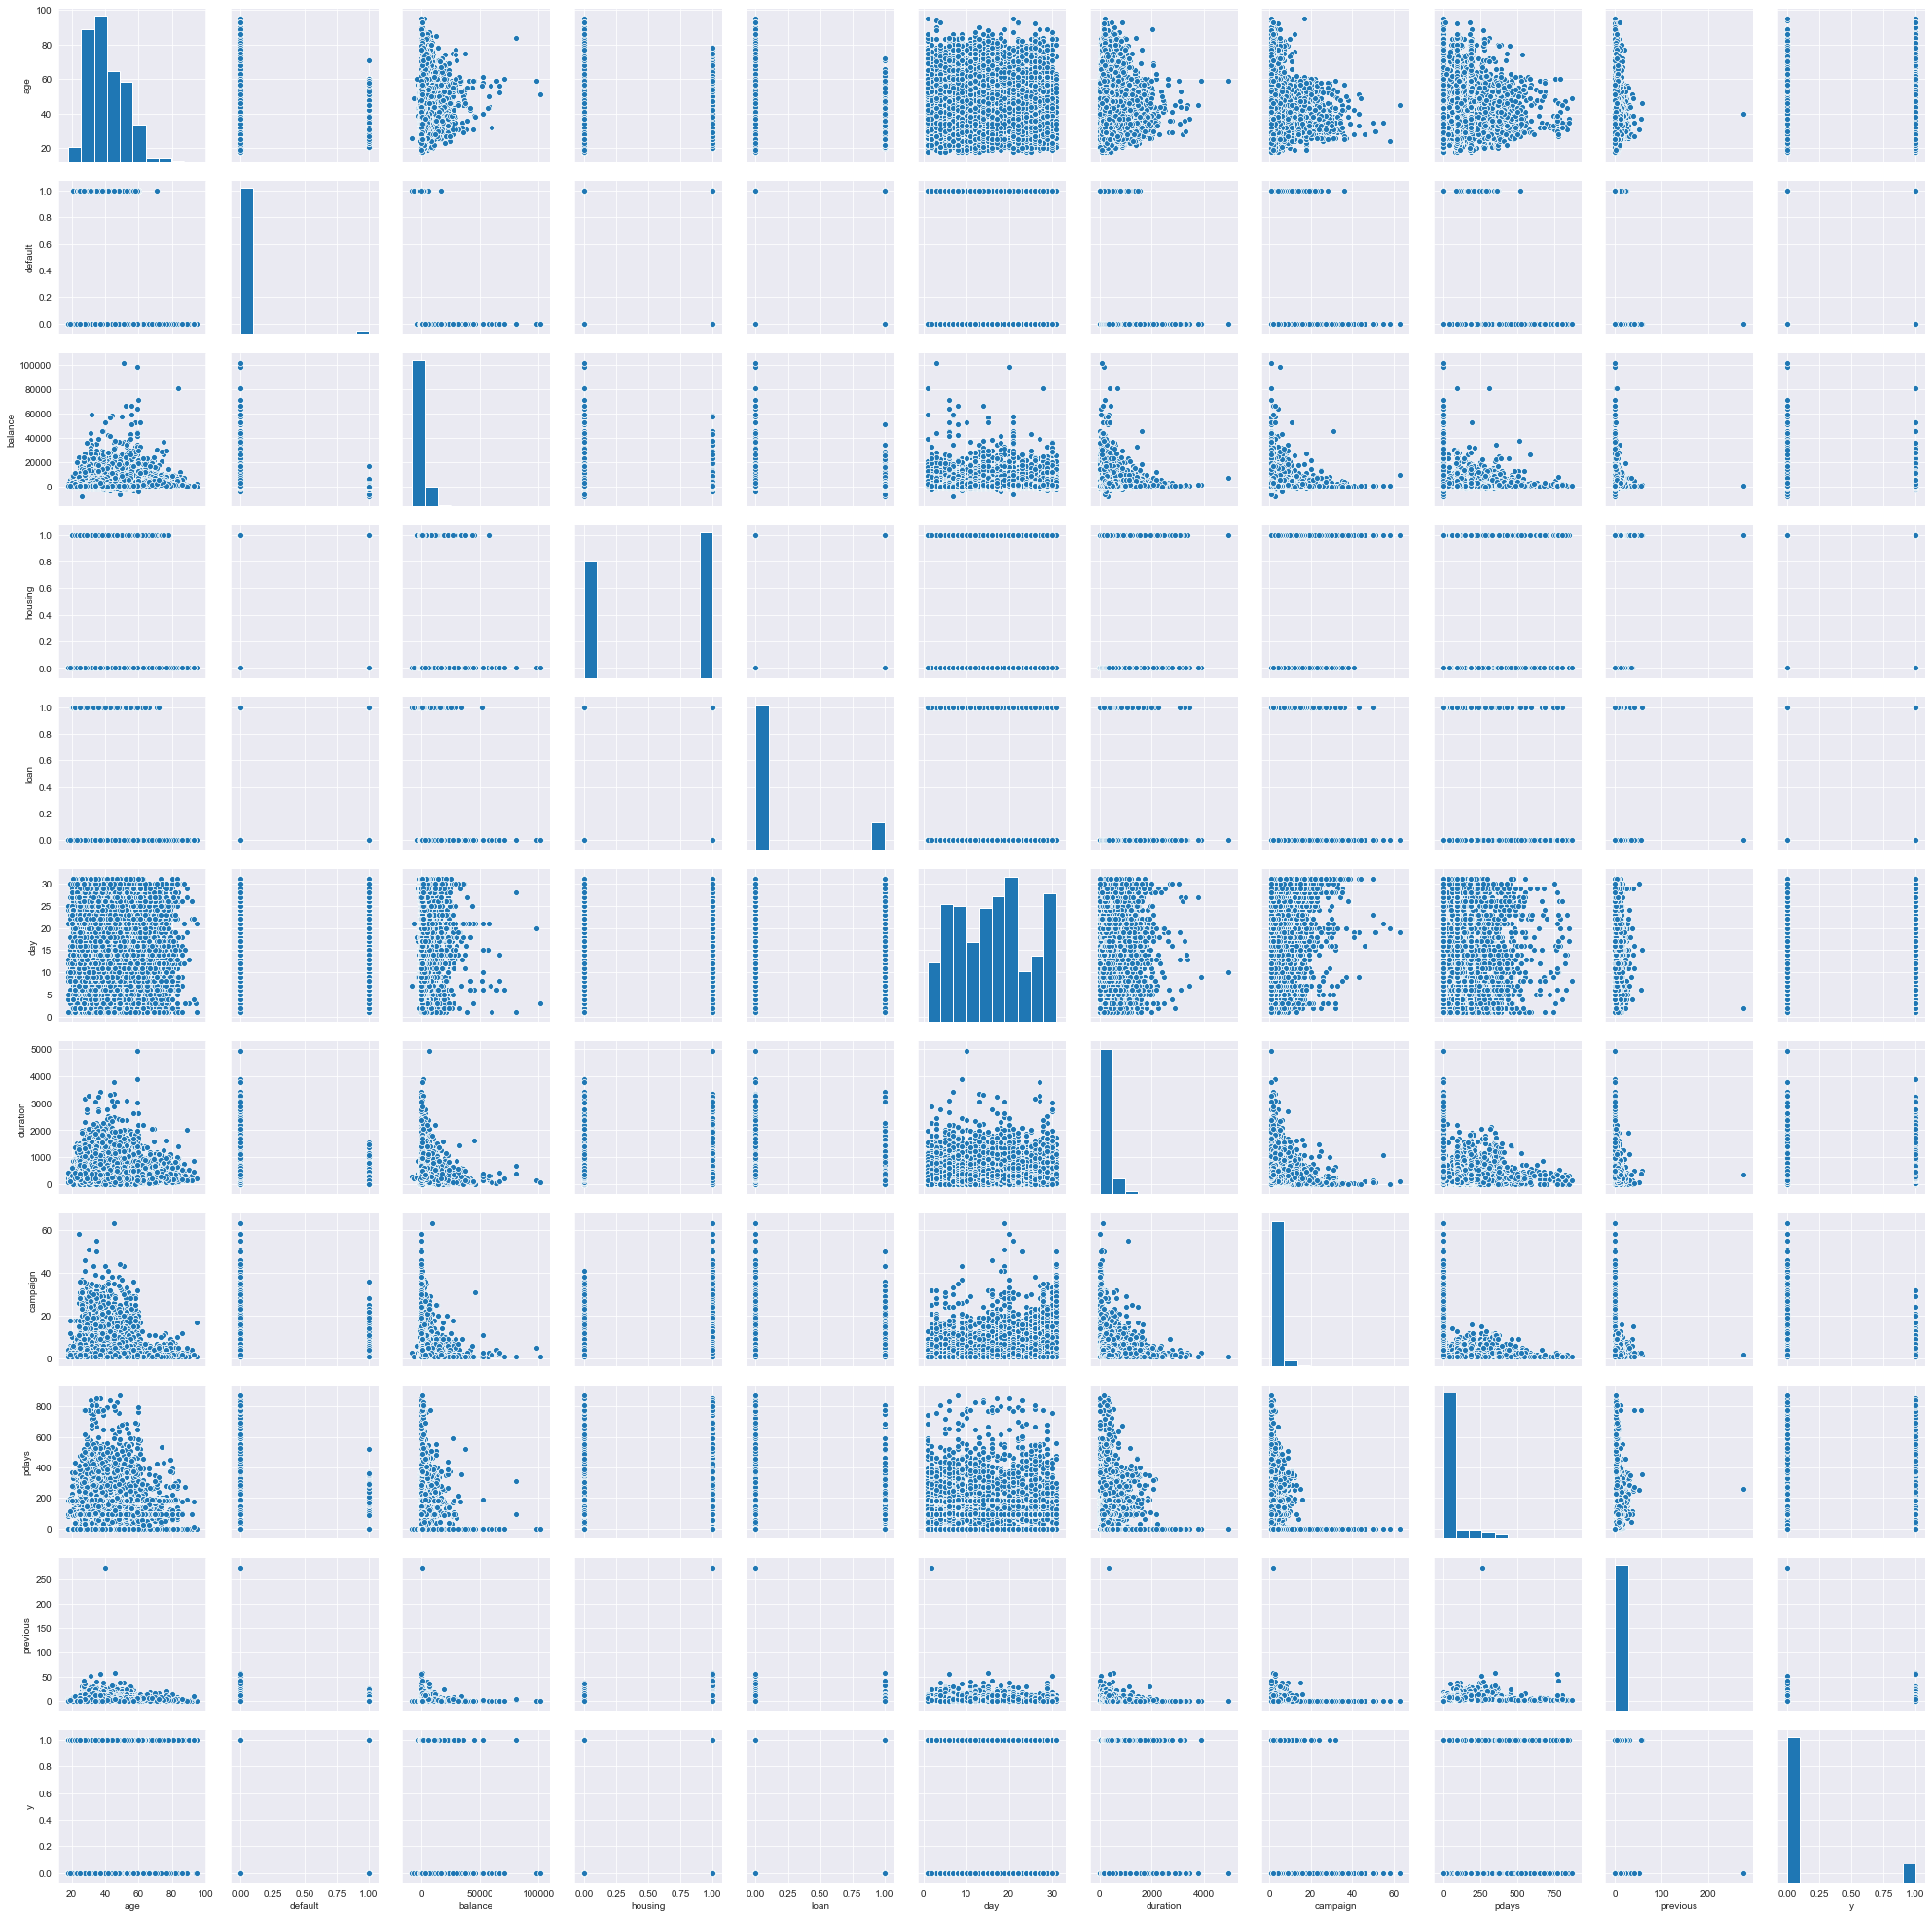

In [16]:
sns.pairplot(df1)

# Data Preparation for building Models

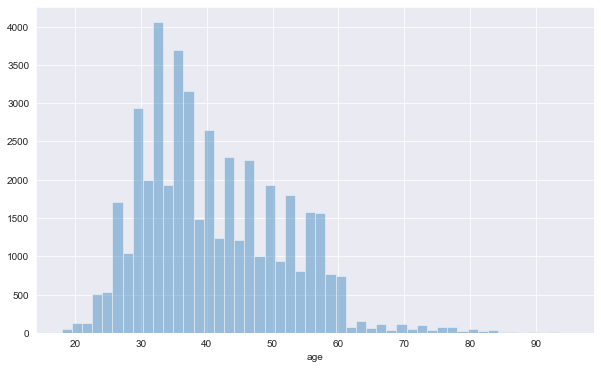

In [17]:
#Checking age distribution of the data
plt.figure(figsize=(10,6))
sns.distplot(a = df1['age'], kde = False)

In [18]:
#We observe that most of the users/clients are within age 30-45 and very less above 60

Z-Score test on Fishy column

In [19]:
#Getting back to pdays column
#there are fishy values in pdays column in dataset.
#seems there are outliers in pdays column so we prform z score test 
z = np.abs(stats.zscore(df1['pdays']))
print(z)
print(np.where(z>3))

[0.41145311 0.41145311 0.41145311 ... 1.43618859 0.41145311 1.4761376 ]
(array([32111, 32147, 32230, ..., 45177, 45188, 45199], dtype=int64),)


In [20]:
# since we discoverd outliers so we remove them and keep only relevant values 
df1 = df1[(z<3)]

In [21]:
df1.shape

(43488, 17)

In [22]:
#Number of rows are decreased

In [23]:
print('Median',df1['pdays'].median())
print('NaN values',df1['pdays'].isna().sum())
df1['pdays'].describe()

Median -1.0
NaN values 0


count    43488.000000
mean        26.638797
std         73.270742
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        340.000000
Name: pdays, dtype: float64

In [24]:
#we can observe that mean is reduced from 40 to 26 but there are still many outliers
#We keep this column and will treat it now

In [25]:
#lets take a value count look at pdays column
df1['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 218        1
 3          1
 25         1
 30         1
 32         1
Name: pdays, Length: 338, dtype: int64

In [26]:
#since majority of users are of -1 value of pdays wich means that the person is not contacted before
#so we make new column pdays_no_contact 
df1['pdays_no_contact']= (df1['pdays']== -1 )*1

In [27]:
df1 #have a look at data now

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_no_contact
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,1


# P-Value Test

In [28]:
#Checking pvalue for all the numerical data
features_names = ['age','default','balance','housing','loan','day','duration','campaign','pdays','previous','pdays_no_contact']
target_name = 'y'
X = df1[features_names].values
Y = df1[target_name].values

In [29]:
#from scipy import stats #(as already imported)
#import numpy as np
import statsmodels.api as sm
mod = sm.OLS(Y,X)
fit = mod.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              1636.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        18:23:38   Log-Likelihood:                         -7215.7
No. Observations:               43488   AIC:                                  1.445e+04
Df Residuals:                   43477   BIC:                                  1.455e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019      0.000     17.183      0.000       0.002       0.002
x2            -0.0124      0.010     -1.209      0.227      -0.033       0.008
x3           2.96e-06   4.52e-07      6.548      0.000    2.07e-06    3.85e-06
x4            -0.0723      0.003    -25.783      0.000      -0.078      -0.067
x5            -0.0393      0.004    -10.495      0.000      -0.047      -0.032
x6             0.0009      0.000      5.631      0.000       0.001       0.001
x7             0.0005   5.27e-06     95.987      0.000       0.000       0.001
x8            -0.0016      0.000     -3.600      0.000      -0.002      -0.001
x9          7.805e-05   3.07e-05      2.544      0.011    1.79e-05       0.000
x10            0.0057      0.001      7.919      0.000       0.004       0.007
x11           -0.0856      0.006    -15.143      0.000      -0.097      -0.074
==============================================================================
Omnibus:                    14171.971   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45123.053
Skew:                           1.685   Prob(JB):                         0.00
Kurtosis:                       6.680   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#p value test is not favouring default and pdays column is not good so we drop those columns
df1 = df1.drop(['default','pdays'], axis=1)

# Encoding Columns

In [31]:
#Now we encode other catagorical data using get_dummies
df1 = pd.get_dummies(df1, columns =['job', 'marital','education','contact','month','poutcome'], drop_first=True)

In [32]:
df1.shape

(43488, 42)

In [33]:
#Shape of data is increased due to encoding
df1 #Have a look now....all the catogories have diffrent seperate columns

,age,balance,housing,loan,day,duration,campaign,previous,y,pdays_no_contact,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,261,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,44,29,1,0,5,151,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,33,2,1,1,5,76,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,1,0,5,92,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,33,1,0,0,5,198,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,17,977,3,0,1,1,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,0,0,17,456,2,0,1,1,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,0,0,17,1127,5,3,1,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,0,0,17,508,4,0,0,1,...,0,0,0,0,1,0,0,0,0,1


# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
x = df1.loc[:,df1.columns != 'y']
y = df1.loc[:,df1.columns == 'y']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [35]:
#Getting length of both train and test
print('Length of x_train :', len(x_train), '\nLength of y_train :',len(y_train))
print('Length of x_test :', len(x_test), '\nLength of y_test :',len(y_test))

Length of x_train : 32616 
Length of y_train : 32616
Length of x_test : 10872 
Length of y_test : 10872


In [36]:
# Normalising data using sklearn standardscaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION MODEL

In [37]:
#Fitting the train and testing the accuracy
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print('Train Accuracy is:', lr.score(x_train,y_train))
print('Test Accuracy is:', lr.score(x_test,y_test))

Train Accuracy is: 0.9029617365710081
Test Accuracy is: 0.9033296541574687


# Hyperparameter tuning on LR

In [38]:
#Parameters building
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [0.001,0.01,0.1,1,10,100,1000]

#making grid of parameters
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

#import random search
from sklearn.model_selection import RandomizedSearchCV 

#building model
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)


random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.872218 using {'max_iter': 140, 'dual': False, 'C': 10}


# Tunned LR Model

Selected Parameters after running Random search several times.

In [39]:
#Building LR model with best parameters found
lr1= LogisticRegression(C=100,max_iter=110,dual= False)
lr1.fit(x_train,y_train)

LogisticRegression(C=100, max_iter=110)

In [40]:
#Testing the accuracy
print('Train Accuracy is:', lr1.score(x_train,y_train))
print('Test Accuracy is:', lr1.score(x_test,y_test))

Train Accuracy is: 0.9029617365710081
Test Accuracy is: 0.9034216335540839


In [41]:
ypred_lr = lr1.predict(x_test)
ypred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Validating LR model using 5 fold cross validaton

In [42]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
results = []
kfold = model_selection.KFold(n_splits=5, random_state=42)
cv_results = model_selection.cross_val_score(lr1, x_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
msg = "{}: {}".format('Logistic Regression accuraacy ', cv_results.mean())
print(msg)

Logistic Regression accuraacy : 0.9025020789052519


# Confusion Matrix for LR Model

In [43]:
#lets create confusion matrix to review performace of model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_lr)
cm

array([[9396,  240],
       [ 810,  426]], dtype=int64)

# F1-score, acuuracy, precision, recall and AUC of LR Model

In [44]:
#F1, acuuracy, precision, recall and AUC
from sklearn.metrics import classification_report
lr_score=(classification_report(y_test, ypred_lr))
print(lr_score)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9636
           1       0.64      0.34      0.45      1236

    accuracy                           0.90     10872
   macro avg       0.78      0.66      0.70     10872
weighted avg       0.89      0.90      0.89     10872



# MAE and MSE of LR Model

In [45]:
from sklearn import metrics
mae_lr = metrics.mean_absolute_error(y_test, ypred_lr)
print('Mean Absolute Error : ',mae_lr)
mse_lr = metrics.mean_squared_error(y_test, ypred_lr)
print('Mean Squared Error : ',mse_lr)

Mean Absolute Error :  0.09657836644591611
Mean Squared Error :  0.09657836644591611


# ROC Curve- LR

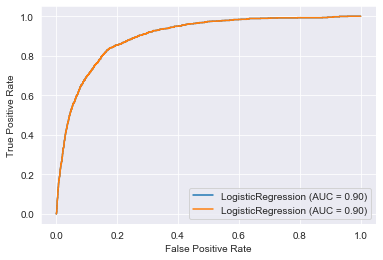

In [46]:
#ROC curve of model
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(lr1,x_test, y_test)
plot_roc_curve(lr1,x_test, y_test,ax=disp.ax_);

# DECISION TREE MODEL

In [47]:
#Building decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt_score_train = dt.score(x_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(x_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.8740802060338484


# Hyperparameter tuning of DT Model
Random search

In [48]:
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [1,2,3,4, None], 
              "max_features": randint(0, 6), 
              "min_samples_leaf": randint(0, 6), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = tree.DecisionTreeClassifier(random_state=42) 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(x, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 4}
Best score is 0.8848647973245454


# DT Model using best parameters 

Selected Parameters after running random search several times.

In [49]:
#Building model using best parameter found
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, max_features = 1, min_samples_leaf = 1, random_state=42)
dt1.fit(x_train, y_train)
dt_score_train1 = dt1.score(x_train, y_train)
print("Training score: ",dt_score_train1)
dt_score_test1 = dt1.score(x_test, y_test)
print("Testing score: ",dt_score_test1)

Training score:  0.8843818984547461
Testing score:  0.8863134657836644


In [50]:
#Getting predicted value of Y
ypred_dt = dt1.predict(x_test)
ypred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Validating DT Model using 5 fold cross validaton

In [51]:
results_dt = []
kfold_dt = model_selection.KFold(n_splits=5, random_state=42)
cv_results_dt = model_selection.cross_val_score(dt1, x_train, y_train, cv=kfold_dt, scoring='accuracy')
results.append(cv_results_dt)
msg_dt = "{}: {}".format('Decision Tree accuracy : ', cv_results_dt.mean())
print(msg_dt)

Decision Tree accuracy : : 0.8843819863741119


# Confusion Matrix for DT Model

In [52]:
#lets create confusion matrix to review performace of model
cm_dt = confusion_matrix(y_test,ypred_dt)
cm_dt

array([[9634,    2],
       [1234,    2]], dtype=int64)

# F1-score, Accuracy, Precision, Recall and AUC of DT

In [53]:
#F1, acuuracy, precision, recall and AUC
dt_score=(classification_report(y_test, ypred_dt))
print(dt_score)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9636
           1       0.50      0.00      0.00      1236

    accuracy                           0.89     10872
   macro avg       0.69      0.50      0.47     10872
weighted avg       0.84      0.89      0.83     10872



# MAE and MSE of DT Model

In [54]:
mae_dt = metrics.mean_absolute_error(y_test, ypred_dt)
print('Mean Absolute Error : ',mae_dt)
mse_dt = metrics.mean_squared_error(y_test, ypred_dt)
print('Mean Squared Error : ',mse_dt)

Mean Absolute Error :  0.11368653421633554
Mean Squared Error :  0.11368653421633554


# ROC Curve - DT

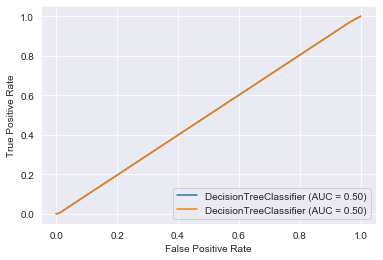

In [55]:
#ROC curve of model
disp_dt=plot_roc_curve(dt1,x_test, y_test)
plot_roc_curve(dt1,x_test, y_test,ax=disp_dt.ax_);

# SUPPORT VECTOR MACHINE MODEL

In [56]:
#Import SVM
from sklearn import svm

#Building Model
svmc = svm.SVC(kernel='rbf')
svmc.fit(x_train, y_train)

SVC()

In [57]:
#Checking score for SVM Model
score_svmc =svmc.score(x_test, y_test)
print('SVM = ',score_svmc)

SVM =  0.9035136129506991


# Hyperparameter Tuning of SVM

In [58]:
#parameter selection
C=[1,2,3,4,5,6]
degree=[1,2,3,4,5,6]
gamma=['scale', 'auto']

#making grid for parameters
param_grid_svm = dict(C=C,degree=degree,gamma=gamma)

Random Search

In [59]:
#Building Random search
random_svm = RandomizedSearchCV(estimator=svmc, param_distributions=param_grid_svm, cv = 3, n_jobs=-1)

random_result_svm = random_svm.fit(x, y)
# Summarize results
print("Best: %f using %s" % (random_result_svm.best_score_, random_result_svm.best_params_))

Best: 0.883416 using {'gamma': 'scale', 'degree': 1, 'C': 1}


# SVM model with upgraded parameters

Selected Parameters after running random search several times.

In [64]:
svmc = svm.SVC(kernel='rbf',degree= 4,C=1, gamma = 'scale')
svmc.fit(x_train, y_train)

SVC(C=1, degree=4)

In [65]:
#Checking Score of new model
score_svmc1 =svmc.score(x_test, y_test)
print('SVM = ',score_svmc1)

SVM =  0.9035136129506991


In [66]:
ypred_svm = svmc.predict(x_test)
ypred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Validating SVM Model using 5 fold cross validaton

In [67]:
results_svm = []
kfold_svm = model_selection.KFold(n_splits=5)
cv_results_svm = model_selection.cross_val_score(svmc, x_train, y_train, cv=kfold_svm, scoring='accuracy')
results.append(cv_results_svm)
msg_svm = "{}: {}".format('SVM accuraacy : ', cv_results_svm.mean())
print(msg_svm)

SVM accuraacy : : 0.9025939577289736


# F1-score, Precision, Recall, Accuracy and AUC of SVM

In [68]:
svm_score= (classification_report(y_test, ypred_svm))
print(svm_score)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9636
           1       0.65      0.33      0.44      1236

    accuracy                           0.90     10872
   macro avg       0.78      0.66      0.69     10872
weighted avg       0.89      0.90      0.89     10872



# MAE and MSE of SVM Model

In [69]:
mae_svm = metrics.mean_absolute_error(y_test, ypred_svm)
print('Mean Absolute Error : ',mae_svm)
mse_svm = metrics.mean_squared_error(y_test, ypred_svm)
print('Mean Squared Error : ',mse_svm)

Mean Absolute Error :  0.09648638704930096
Mean Squared Error :  0.09648638704930096


# ROC Curve - SVM

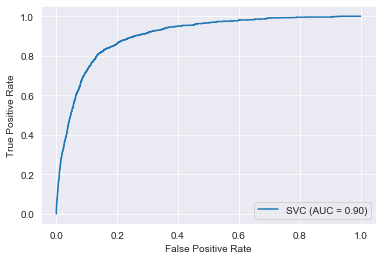

In [70]:
disp_svm =plot_roc_curve(svmc,x_test, y_test);

# RANDOM FOREST CLASSIFIER

In [71]:
#importing random forest classifer
from sklearn.ensemble import RandomForestClassifier

#Building model with random state 42
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Checking score of RFC Model

In [72]:
score_rfc =rfc.score(x_test, y_test)
score_rfc

0.9071008094186902

# Hyperparameter tuning of RFC Model

Randomized search

In [75]:
#building grid
#from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
            
print(random_grid)

{'n_estimators': [200, 400, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None]}


In [76]:
# Use the random grid to search for best parameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 32.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600]},
                   random_state=42, verbose=2)

In [77]:
#Lets see best parameters
rf_random.best_params_

{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 10}

In [82]:
#Fitting
rfc1=RandomForestClassifier(n_estimators = 400,max_features = 'sqrt' ,max_depth = 10,random_state=42)
rfc1.fit(x_test, y_test)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=400,
                       random_state=42)

In [83]:
#SCORE
score_rfc1 =rfc1.score(x_test, y_test)
print('RF=',score_rfc1)

RF= 0.9230132450331126


Grid search

In [86]:
#Importing Grid search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid_rfc = {
    'max_depth': [10,20,30],
    'max_features': ['sqrt'],
    'n_estimators': [200, 300, 400]
}

# Create a based model
rfc = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, cv = 5, n_jobs = -1, verbose = 2)

In [87]:
# Fit the grid search to the data
grid_search_rfc.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'max_features': ['sqrt'],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

In [88]:
#Best parameters 
grid_search_rfc.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 400}

In [90]:
#Fitting best parameters
rfc2=RandomForestClassifier(n_estimators = 400,max_features = 'sqrt' ,max_depth = 10,random_state=42)

In [91]:
rfc2.fit(x_test, y_test)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=400,
                       random_state=42)

In [92]:
#Score
score_rfc2 =rfc2.score(x_test, y_test)
print('RF=',score_rfc2)

RF= 0.9230132450331126


In [93]:
ypred_rfc = rfc2.predict(x_test)
ypred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Confusion Matrix for RFC Model

In [94]:
cm_rfc = confusion_matrix(y_test,ypred_rfc)
cm_rfc

array([[9616,   20],
       [ 817,  419]], dtype=int64)

# F1-score, Precision, Recall, Accuracy and AUC of RFC

In [95]:
rfc_score= (classification_report(y_test, ypred_rfc))
print(rfc_score)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9636
           1       0.95      0.34      0.50      1236

    accuracy                           0.92     10872
   macro avg       0.94      0.67      0.73     10872
weighted avg       0.93      0.92      0.91     10872



# MAE and MSE of RFC Model

In [96]:
mae_rfc = metrics.mean_absolute_error(y_test, ypred_rfc)
print('Mean Absolute Error : ',mae_rfc)
mse_rfc = metrics.mean_squared_error(y_test, ypred_rfc)
print('Mean Squared Error : ',mse_rfc)

Mean Absolute Error :  0.07698675496688742
Mean Squared Error :  0.07698675496688742


# Validating RFC Model using 5 Fold Cross Validation

In [98]:
#Validating using 5 fold kfold cross validation
results_rfc=[]
kfold_rfc=model_selection.KFold(n_splits=5)
cv_results_rfc = model_selection.cross_val_score(rfc2,x_train,y_train,cv=kfold_rfc, scoring='accuracy')
results_rfc.append(cv_results_rfc)
print('Random Forest : ',cv_results_rfc.mean())

Random Forest :  0.8990373496112845


# ROC Curve - RFC

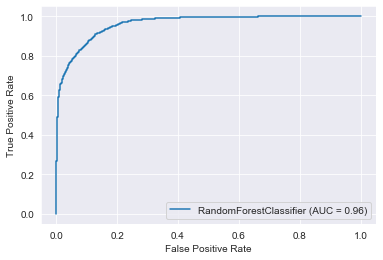

In [99]:
#ROC curve
disp_rfc = plot_roc_curve(rfc2,x_test, y_test)

# COMPARING MODELS

ROC comparision

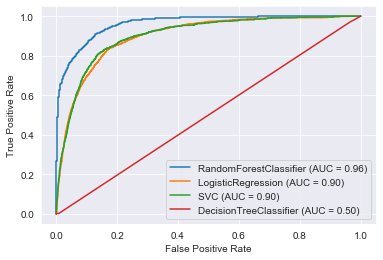

In [103]:
disp=plot_roc_curve(rfc2,x_test, y_test)
plot_roc_curve(lr1,x_test, y_test,ax=disp.ax_);
plot_roc_curve(svmc,x_test, y_test,ax=disp.ax_);
plot_roc_curve(dt1,x_test, y_test,ax=disp.ax_);

Comparision Dataframe

In [104]:
#Dataframe
compare_models = pd.DataFrame( 
    {  'Model' : ['RANDOM FOREST','LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE','DECISION TREE'], 
       'Score' : [cv_results_rfc.mean(), cv_results.mean(),cv_results_svm.mean(),cv_results_dt.mean()],
       'AUC' : ['0.96','0.90','0.90','0.50'],
        'Mean Absolute Error'  : [mae_rfc, mae_lr, mae_svm, mae_dt], 
        'Mean Squared Error'  : [mse_rfc, mse_lr, mse_svm, mse_dt] 
    })  
compare_models

,Model,Score,AUC,Mean Absolute Error,Mean Squared Error
0,RANDOM FOREST,0.899037,0.96,0.076987,0.076987
1,LOGISTIC REGRESSION,0.902502,0.90,0.096578,0.096578
2,SUPPORT VECTOR MACHINE,0.902594,0.90,0.096486,0.096486
3,DECISION TREE,0.884382,0.50,0.113687,0.113687


# CONCLUSION

Random Forest Classifier have the higest AUC and minimum MAE amongst all the Models, hence we select Random Forest Classifier model as the best Model suited for this Dataset.

Submitted By : Shreyank Purohit 

LinkedIn id: [shreyankpurohit13](https://www.linkedin.com/in/shreyankpurohit13/)

Github id: [Shreyank1397](https://github.com/Shreyank1397)